In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_excel("编码.xlsx")
df.head()

,日期,排名,热搜词,热度,公共事件,新冠疫情,娱乐体育
0,2020-01-07 16:00:00,1,郑爽爸爸微博评论,3233504,1,0,1
1,2020-01-07 16:00:00,2,伊朗外长被美国拒签,1449909,1,0,0
2,2020-01-07 16:00:00,3,鹿晗 我状态跟你有啥关系,1433392,0,0,1
3,2020-01-07 16:00:00,4,现代版庆余年,1235314,0,0,1
4,2020-01-07 16:00:00,5,宋祖儿方否认与阮经天恋情,907979,0,0,1


In [15]:
df['月份'] = df['日期'].apply(lambda x:x[:7])
df.head()

,日期,排名,热搜词,热度,公共事件,新冠疫情,娱乐体育,月份
0,2020-01-07 16:00:00,1,郑爽爸爸微博评论,3233504,1,0,1,2020-01
1,2020-01-07 16:00:00,2,伊朗外长被美国拒签,1449909,1,0,0,2020-01
2,2020-01-07 16:00:00,3,鹿晗 我状态跟你有啥关系,1433392,0,0,1,2020-01
3,2020-01-07 16:00:00,4,现代版庆余年,1235314,0,0,1,2020-01
4,2020-01-07 16:00:00,5,宋祖儿方否认与阮经天恋情,907979,0,0,1,2020-01


# 编码为1的占比月变化趋势

In [16]:
pivot_table = pd.pivot_table(df,
                             index=['月份'],
                             values= ['公共事件','新冠疫情','娱乐体育'],
                            aggfunc='mean'
                            )
pivot_table.to_excel("编码分月占比.xlsx")
pivot_table.head()

,公共事件,娱乐体育,新冠疫情
月份,,,
2020-01,0.507289,0.285714,0.370262
2020-02,0.601719,0.232092,0.484241
2020-03,0.500000,0.274566,0.384393
2020-04,0.432277,0.279539,0.285303
2020-05,0.334311,0.296188,0.090909


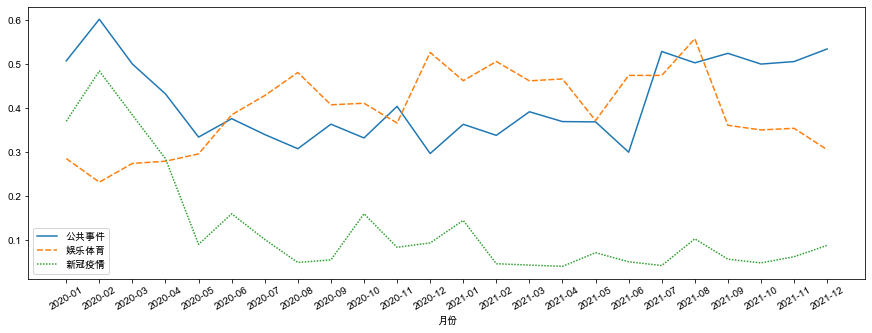

In [17]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']# 用来正常显示中文标签

plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
sns.lineplot(data=pivot_table)
plt.savefig("编码趋势-汇总.png")

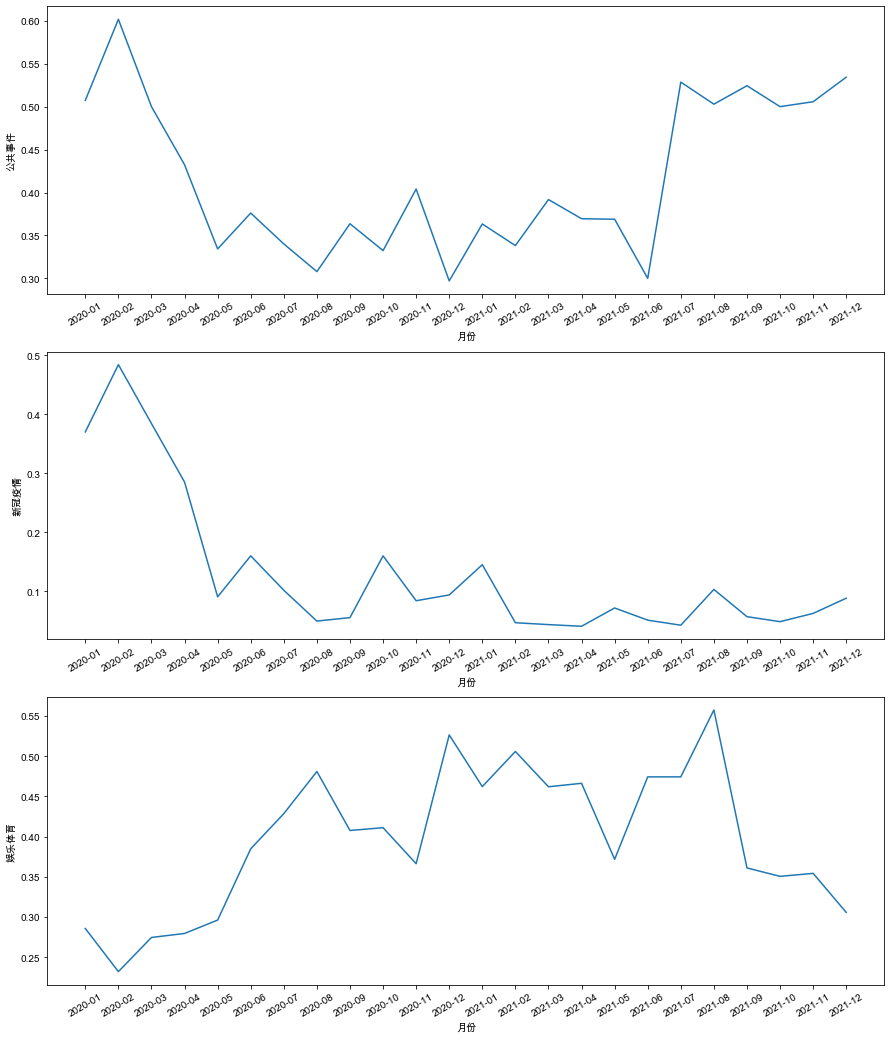

In [27]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']# 用来正常显示中文标签

plt.figure(figsize=(15,18))

plt.subplot(3,1,1)
plt.xticks(rotation=30)
sns.lineplot(x=pivot_table.index, y=pivot_table['公共事件'])

plt.subplot(3,1,2)
plt.xticks(rotation=30)
sns.lineplot(x=pivot_table.index, y=pivot_table['新冠疫情'])

plt.subplot(3,1,3)
plt.xticks(rotation=30)
sns.lineplot(x=pivot_table.index, y=pivot_table['娱乐体育'])

plt.savefig('编码趋势-分离.png')

# 热搜分区

In [28]:
def classify(x):
    if x<=16:
        return '1-16'
    elif x >= 17 and x<=32:
        return '17-32'
    elif x >=33:
        return '33-50'

In [29]:
df['热搜排名'] = df['排名'].apply(classify)
df.head()

,日期,排名,热搜词,热度,公共事件,新冠疫情,娱乐体育,月份,热搜排名
0,2020-01-07 16:00:00,1,郑爽爸爸微博评论,3233504,1,0,1,2020-01,1-16
1,2020-01-07 16:00:00,2,伊朗外长被美国拒签,1449909,1,0,0,2020-01,1-16
2,2020-01-07 16:00:00,3,鹿晗 我状态跟你有啥关系,1433392,0,0,1,2020-01,1-16
3,2020-01-07 16:00:00,4,现代版庆余年,1235314,0,0,1,2020-01,1-16
4,2020-01-07 16:00:00,5,宋祖儿方否认与阮经天恋情,907979,0,0,1,2020-01,1-16


In [32]:
pivot_table2 = pd.pivot_table(df,
                             index=['月份'],
                              columns='热搜排名',
                              values=['公共事件','新冠疫情','娱乐体育'],
                             aggfunc='mean')
pivot_table2.to_excel("热搜排名分区.xlsx")
pivot_table2.head()

公共事件                          娱乐体育                          新冠疫情  \
热搜排名         1-16     17-32     33-50      1-16     17-32     33-50      1-16   
月份                                                                              
2020-01  0.607143  0.482143  0.436975  0.321429  0.241071  0.294118  0.464286   
2020-02  0.678571  0.526786  0.600000  0.169643  0.285714  0.240000  0.598214   
2020-03  0.616071  0.357143  0.524590  0.267857  0.392857  0.172131  0.482143   
2020-04  0.464286  0.383929  0.447154  0.339286  0.285714  0.219512  0.285714   
2020-05  0.330357  0.196429  0.470085  0.366071  0.348214  0.179487  0.098214   

                             
热搜排名        17-32     33-50  
月份                           
2020-01  0.303571  0.344538  
2020-02  0.446429  0.416000  
2020-03  0.294643  0.377049  
2020-04  0.214286  0.349593  
2020-05  0.071429  0.102564

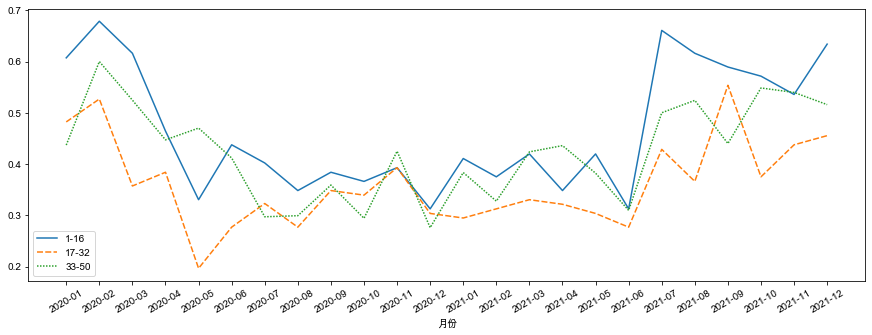

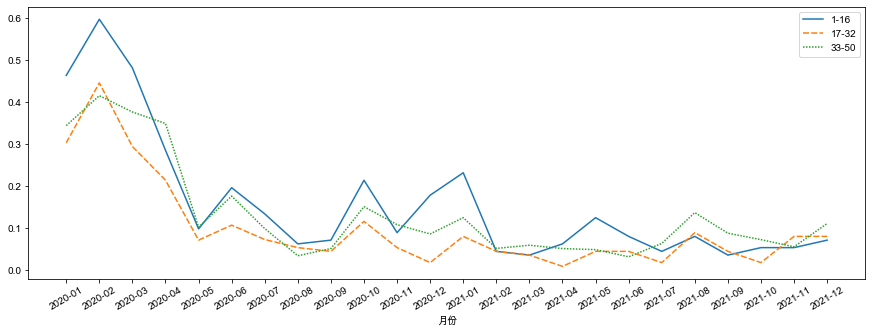

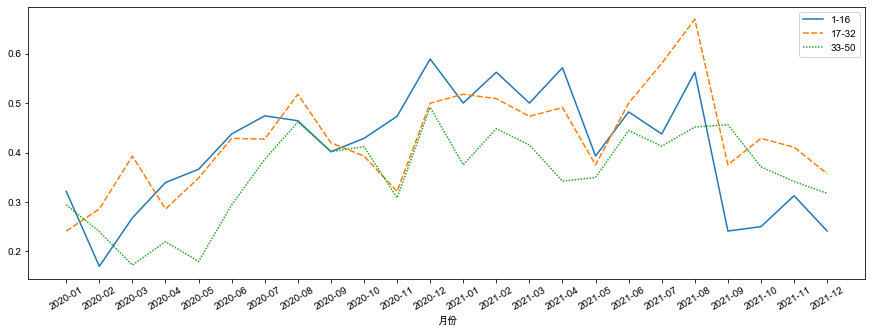

In [36]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签

# 公共事件
plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
sns.lineplot(data=pivot_table2['公共事件'])

plt.savefig("热度分区-公共事件.png")

# 新冠疫情
plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
sns.lineplot(data=pivot_table2['新冠疫情'])

plt.savefig("热度分区-新冠疫情.png")

# 娱乐体育
plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
sns.lineplot(data=pivot_table2['娱乐体育'])

plt.savefig("热度分区-娱乐体育.png")

In [ ]:
plt.title("2020-2021年微博热搜中不同排名区间的公共事件占比")
plt.title("2020-2021年微博热搜中不同排名区间的新冠疫情占比")
plt.title("2020-2021年微博热搜中不同排名区间的娱乐体育占比")